Visualize the data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os


taxonomy_deep = pd.read_pickle('preprocessed_data/rarefied_kraken_species_level_taxonomy_filtered_ra.pkl')

blood = pd.read_pickle('preprocessed_data/blood_measurments_preprocessed.pkl')

blood_metabolites = pd.read_pickle('preprocessed_data/blood_metabolites_preprocessed.pkl')

Taxonomy:

In [3]:
taxonomy_deep.shape

(1097, 305)

<Axes: ylabel='Frequency'>

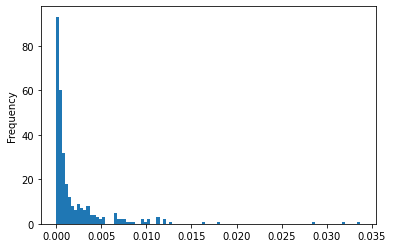

In [6]:
taxonomy_deep.iloc[0].plot.hist(bins=100)

<Axes: ylabel='Frequency'>

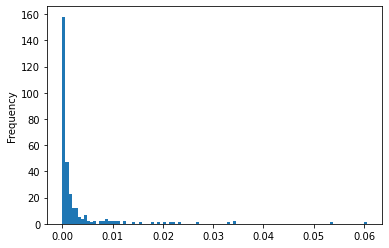

In [9]:
taxonomy_deep.sample(n=1).squeeze().plot.hist(bins=100)

In [ ]:
We have a very diverse sample (a lot of the taxa have abundant < 0.5 %

In [11]:
# Look at the Taxonomic tree? 
taxonomy_deep.describe()

,Ruminiclostridium_E siraeum,CAG-1427 sp000435675,Blautia_A faecis,Tidjanibacter inops_A,Gemmiger qucibialis,Collinsella sp900556515,UMGS1375 sp900066615,Bacteroides intestinigallinarum,Acetatifactor intestinalis,Butyribacter sp003529475,...,Eubacterium_F sp900539115,Blautia_A sp900548245,Ruminococcus_E sp905215855,Agathobacter rectalis,Prevotella sp003447235,Prevotella sp900546535,Prevotella hominis,Prevotella sp900556795,Cryptobacteroides sp000433355,Limisoma sp000437795
count,1097.000000,1.097000e+03,1097.000000,1097.000000,1097.000000,1097.000000,1.097000e+03,1097.000000,1097.000000,1097.000000,...,1097.000000,1097.000000,1097.000000,1097.000000,1.097000e+03,1097.000000,1097.000000,1097.000000,1097.000000,1.097000e+03
mean,0.001570,4.641896e-04,0.007622,0.000842,0.017687,0.001244,2.920388e-03,0.000514,0.001409,0.001296,...,0.000394,0.002956,0.001772,0.021895,1.016929e-03,0.001285,0.001035,0.000451,0.001503,6.447508e-04
std,0.004787,1.488868e-03,0.006899,0.003395,0.019172,0.003243,3.657577e-03,0.000896,0.002891,0.002465,...,0.000857,0.006185,0.001943,0.022835,4.239269e-03,0.004830,0.005784,0.001863,0.006636,2.889868e-03
min,0.000000,0.000000e+00,0.000008,0.000000,0.000012,0.000051,8.449339e-07,0.000000,0.000000,0.000000,...,0.000000,0.000044,0.000000,0.000018,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000022,8.449339e-07,0.003293,0.000004,0.004801,0.000476,3.078939e-04,0.000081,0.000126,0.000078,...,0.000019,0.000678,0.000039,0.005386,8.449339e-07,0.000003,0.000002,0.000003,0.000000,6.759471e-07
50%,0.000164,6.590484e-06,0.005741,0.000018,0.011567,0.000707,1.465453e-03,0.000222,0.000423,0.000317,...,0.000044,0.001052,0.001272,0.014411,3.548722e-06,0.000016,0.000012,0.000009,0.000002,2.534802e-06
75%,0.000939,1.738874e-04,0.009744,0.000426,0.023485,0.000953,4.135106e-03,0.000544,0.001337,0.001429,...,0.000374,0.002451,0.002963,0.031235,2.653092e-05,0.000512,0.000274,0.000173,0.000006,8.449339e-06
max,0.081005,2.263392e-02,0.081322,0.074765,0.136955,0.035172,2.700307e-02,0.008381,0.034206,0.023803,...,0.008831,0.065160,0.013084,0.161938,5.116024e-02,0.072749,0.107833,0.033127,0.079007,3.797995e-02


<Axes: ylabel='Frequency'>

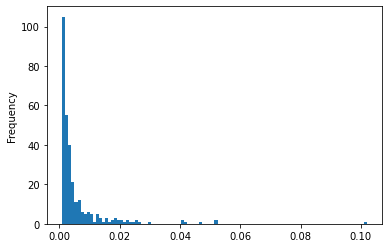

In [16]:
taxonomy_deep.quantile(0.9).plot.hist(bins=100)

<Axes: ylabel='Frequency'>

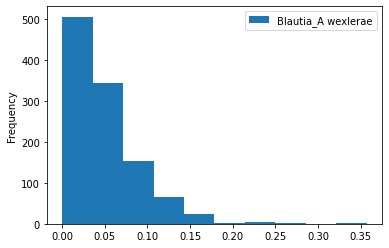

In [20]:
taxonomy_deep[taxonomy_deep.columns[taxonomy_deep.quantile(0.9) > 0.06]].plot.hist()

<Axes: ylabel='Frequency'>

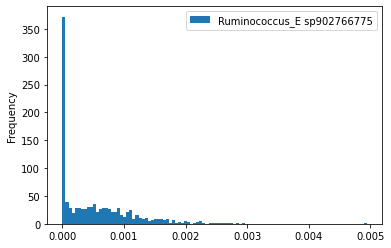

In [28]:
taxonomy_deep.sample(n=1, axis=1).plot.hist(bins=100)

Why don't we do log to the RA values?

Blood measurements:

In [29]:
blood.shape

(1044, 25)

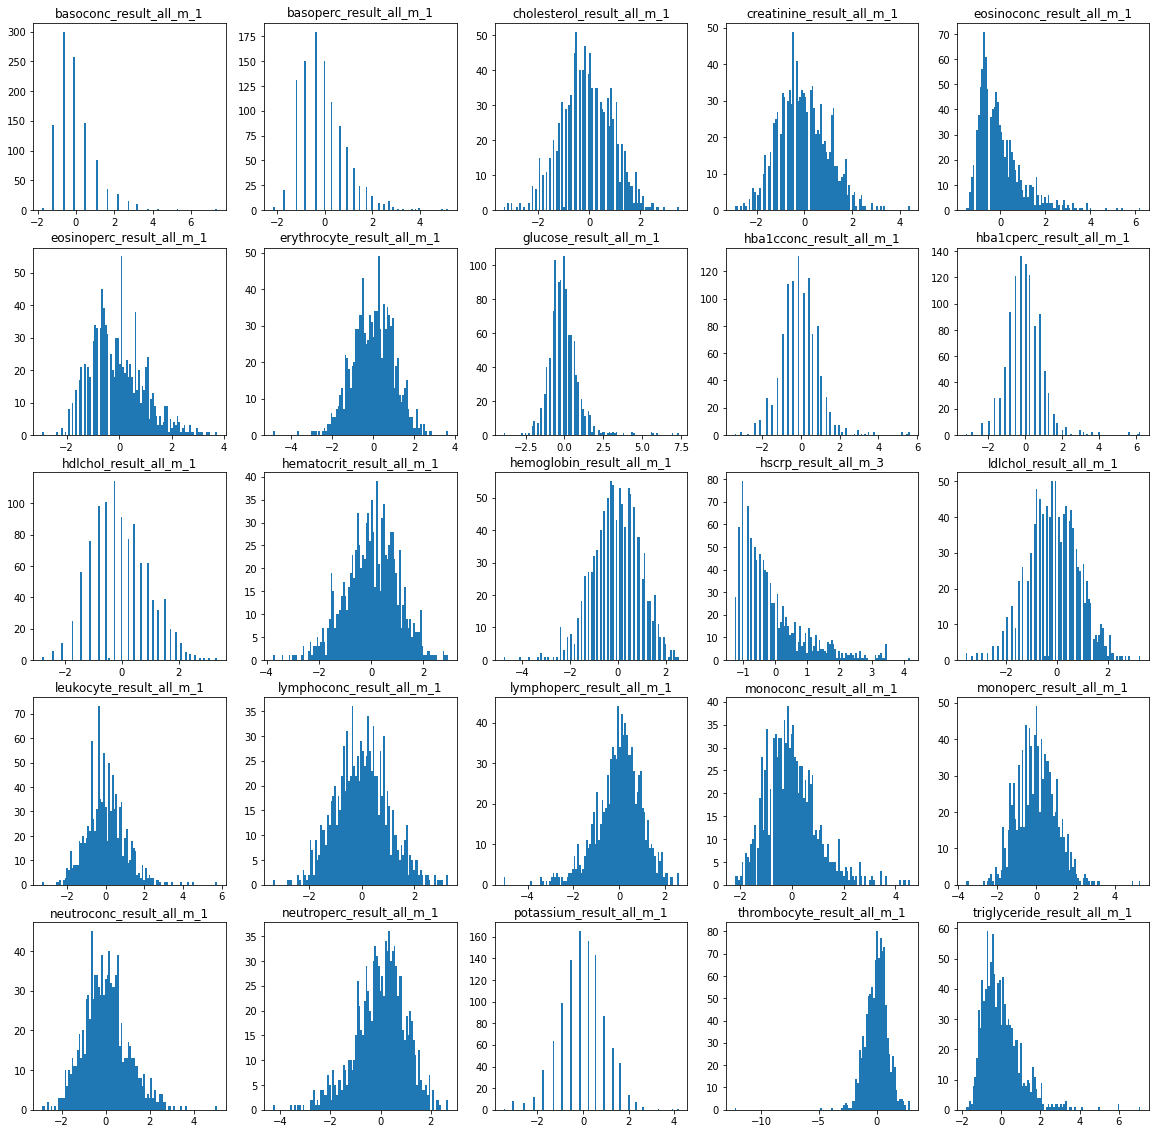

In [35]:
# Plot the distribution of the blood measurments: 

fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(20,20))
for i, m_name in enumerate(blood.columns):
    r = i//5
    c = i%5
    ax[r][c].hist(blood[m_name], bins=100, label=m_name)
    ax[r][c].set_title(m_name)

Consider removing outlier (by cutting the outliers and setting nans in the extreme values, therefore in correlation or prediction they will be omitted). 
Remember the data was proccessed using Standard Scaler, so +-4 std is quite extreme values.

In [41]:
blood = blood.where((blood >= -4) & (blood <= 4))

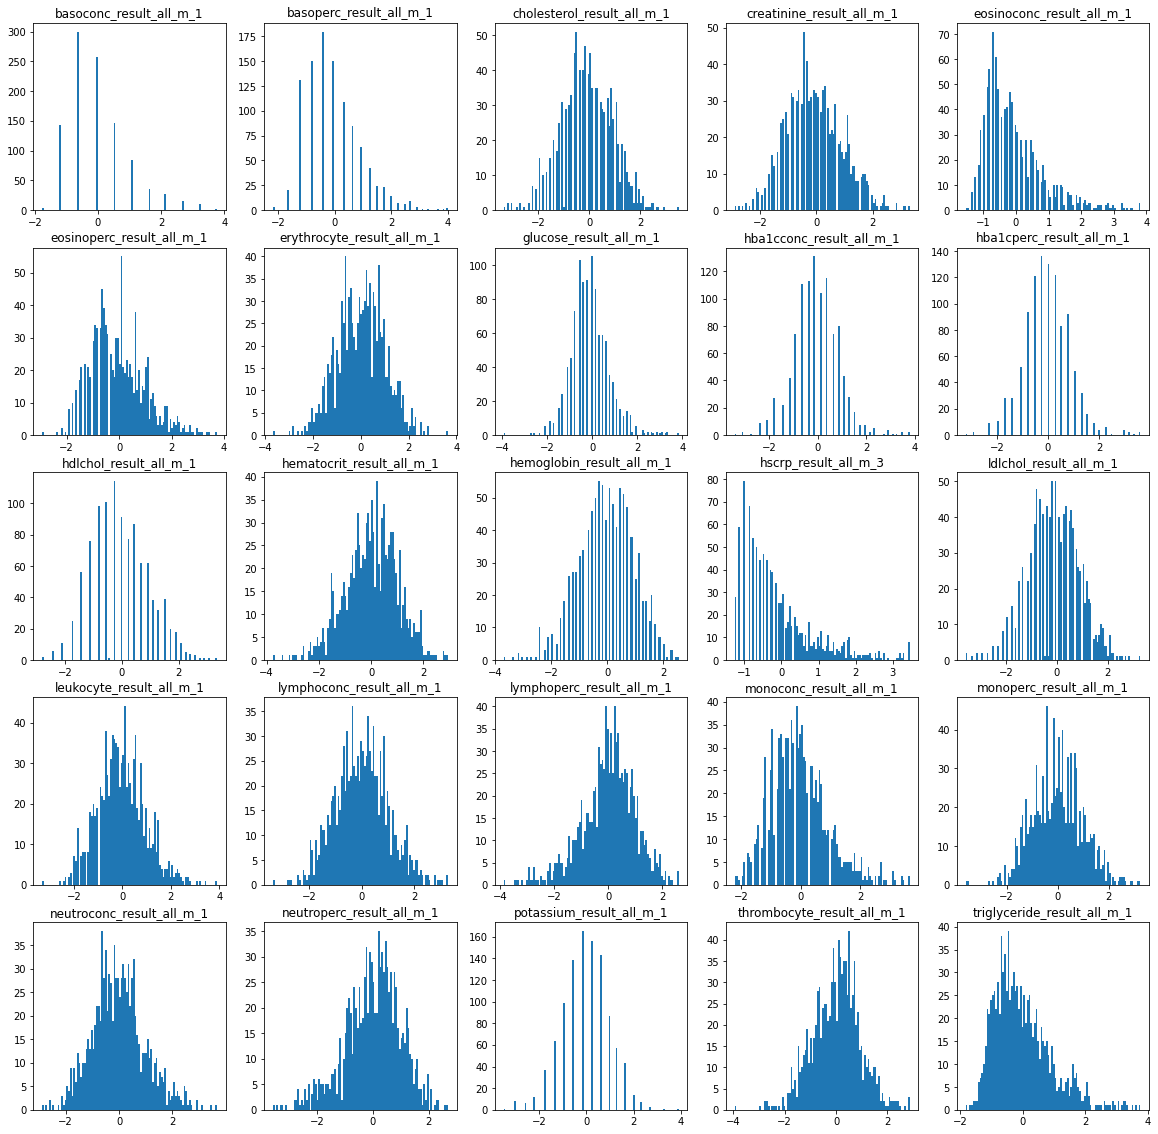

In [42]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(20,20))
for i, m_name in enumerate(blood.columns):
    r = i//5
    c = i%5
    ax[r][c].hist(blood[m_name], bins=100, label=m_name)
    ax[r][c].set_title(m_name)

Metabolites:

Research question: 
Is there a representation/ embedding of the microbiome comminty in which we can see the relation between the Blood measurments/metaboloites and the microbiome as a GLM? (In pdp or others?)

Should we account for any covariates in the data? 

In [43]:
blood_metabolites.shape

(1440, 215)